### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [8]:
data = pd.read_csv('data/coupons.csv')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [30]:
data.info()
missing_values = data.isnull().mean()
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [90]:
data_cleaned = data.drop(columns=['car'])
data_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [93]:
coupon_acceptance_rate = data_cleaned['Y'].mean()
print(coupon_acceptance_rate)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

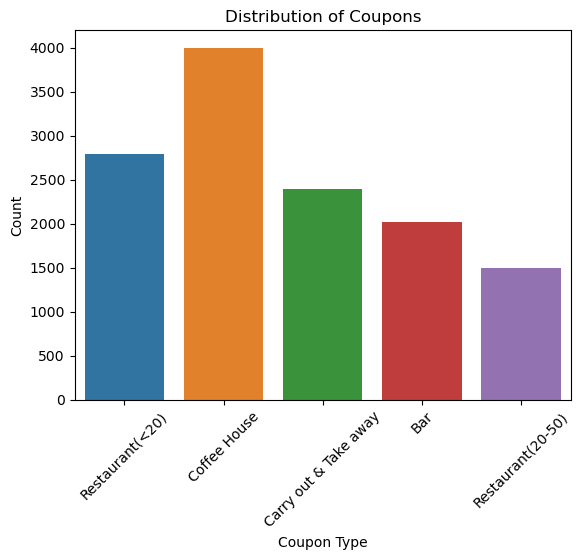

In [96]:
sns.countplot(x='coupon', data=data_cleaned)
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

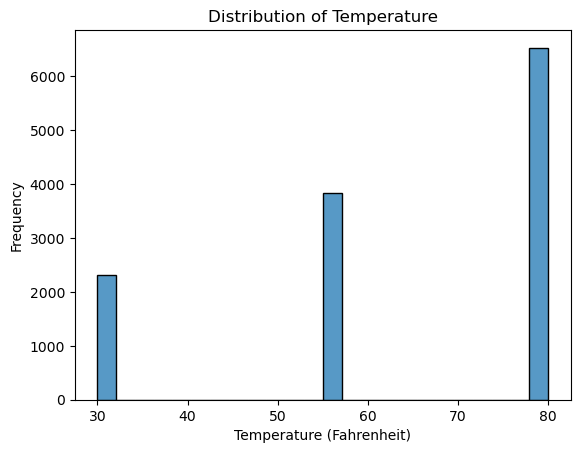

In [102]:
sns.histplot(data_cleaned['temperature'])
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [104]:
bar_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [108]:
bar_coupons_acceptance_rate = bar_coupons_df['Y'].mean()
print(bar_coupons_acceptance_rate)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [114]:
def categorize_bar_visits(x):
    if x in ['never', 'less1', '1~3']:
        return '3 or fewer'
    else:
        return 'more than 3'

bar_coupons_df.loc[:, 'bar_visit_category'] = bar_coupons_df['Bar'].apply(categorize_bar_visits)

acceptance_rate_by_category = bar_coupons_df.groupby('bar_visit_category')['Y'].mean()

print(acceptance_rate_by_category)

bar_visit_category
3 or fewer     0.370737
more than 3    0.768844
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [120]:
def categorize_drivers(bar_visits, age):
    if bar_visits in ['greater1', '1~3', '4~8', 'gt8'] and age not in ['below21', '21', '26']:
        return 'More than once a month and over 25'
    else:
        return 'All others'

data_cleaned['driver_category'] = data_cleaned.apply(lambda row: categorize_drivers(row['Bar'], row['age']), axis=1)

acceptance_rate_by_category = data_cleaned.groupby('driver_category')['Y'].mean()

print(acceptance_rate_by_category)

driver_category
All others                            0.561765
More than once a month and over 25    0.613776
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [126]:
def categorize_drivers(bar_visits, passenger, occupation):
    if bar_visits in ['greater1', '1~3', '4~8', 'gt8'] and passenger != 'Kid(s)' and occupation not in ['farming', 'fishing', 'forestry']:
        return 'More than once a month, no kid passengers, and other occupations'
    else:
        return 'All others'

data_cleaned['driver_category'] = data_cleaned.apply(lambda row: categorize_drivers(row['Bar'], row['passanger'], row['occupation']), axis=1)

acceptance_rate_by_category = data_cleaned.groupby('driver_category')['Y'].mean()

print(acceptance_rate_by_category)

driver_category
All others                                                          0.545950
More than once a month, no kid passengers, and other occupations    0.623106
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [132]:
# Define a function to categorize drivers based on the specified criteria
def categorize_drivers(row):
    if row['Bar'] in ['greater1', '1~3', '4~8', 'gt8'] and row['passanger'] != 'Kid(s)' and row['maritalStatus'] != 'Widowed':
        return 'Group 1: Bars >1/month, no kid passengers, not widowed'
    elif row['Bar'] in ['greater1', '1~3', '4~8', 'gt8'] and row['age'] in ['below21', '21', '26', '30']:
        return 'Group 2: Bars >1/month, under 30'
    elif row['RestaurantLessThan20'] in ['4~8', 'gt8'] and row['income'] in ['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']:
        return 'Group 3: Cheap restaurants >4/month, income <50K'
    else:
        return 'Others'

data_cleaned['driver_category'] = data_cleaned.apply(categorize_drivers, axis=1)

acceptance_rate_by_category = data_cleaned.groupby('driver_category')['Y'].mean()

print(acceptance_rate_by_category)

driver_category
Group 1: Bars >1/month, no kid passengers, not widowed    0.623106
Group 2: Bars >1/month, under 30                          0.725000
Group 3: Cheap restaurants >4/month, income <50K          0.555856
Others                                                    0.543634
Name: Y, dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [148]:
### 1.	Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:
	### These drivers might have a more active social life and are more likely to go out with friends or partners rather than children, making them more inclined to accept bar coupons.
	### They may have fewer responsibilities at home (e.g., no children to care for), making them more available and willing to visit bars.
### 2.	Drivers who go to bars more than once a month and are under the age of 30:
	### Younger individuals, especially those under 30, might be more inclined to visit bars frequently as part of their social activities. They may be more receptive to bar coupons due to their lifestyle and social habits.
	### Younger drivers may be more spontaneous and open to detours or impromptu plans, making them more likely to accept bar coupons when offered.
### 3.	Drivers who go to cheap restaurants more than 4 times a month and have an income less than $50K:
	### These drivers might be more budget-conscious and therefore more likely to accept coupons for cost-saving opportunities.
	### Their frequent dining habits at inexpensive restaurants indicate that they enjoy eating out, which may extend to bars if a coupon offers a good deal.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [140]:
coffee_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Coffee House'].copy()

In [144]:
def categorize_passengers(row):
    if row['passanger'] == 'Kid(s)':
        return 'With Kids'
    elif row['age'] in ['below21', '21', '26', '31'] and row['income'] in ['less than $12500', '$12500 - $24999', '$25000 - $37499']:
        return 'Young and Low Income'
    elif row['education'] in ['Some college - no degree', 'Associates degree', 'High School']:
        return 'Less Educated'
    else:
        return 'Others'

coffee_coupons_df['passenger_category'] = coffee_coupons_df.apply(categorize_passengers, axis=1)

In [146]:
acceptance_rate_by_category = coffee_coupons_df.groupby('passenger_category')['Y'].mean()

print(acceptance_rate_by_category)

passenger_category
Less Educated           0.527174
Others                  0.477338
With Kids               0.483092
Young and Low Income    0.506596
Name: Y, dtype: float64
